# Plot countries visited ever

In [9]:
# User defined info.

# 1. Countries visited.
countries_visited = [
    "Japan (Osaka)", "China (Hongkong, Makau)", "Taiwan (Taipei)", "South Korea (Seoul)", "USA (Hawaii)", 
    "USA (Hawaii)", "Malaysia (Kuala Lumpur)", "USA (Houston)", "South Korea (Busan)", "Chile (Santiago, Antofagasta, Puerto Montt)", 
    "USA (Flagstaff, Arizona)", "France (Nice)", "Monaco", "China (Tianjin, Beijing)", "France (Paris)",
    "USA (Hawaii)", "Germany (Darmstadt, Düsseldorf, Köln)", "Belgium (Brussels)", "Germany (Munich)", "Hungary (Budapest)", 
    "Sweden (Stockholm)", "Norway (Oslo)", "Italy (Genova)", "Finland (Helsinki)",
]

# 2. Output filename
out = "countries_visited.png"

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Mapping
name_map = {
    "Japan": "Japan",
    "USA": "United States of America",
    "South Korea": "South Korea",
    "Taiwan": "Taiwan",
    "Hongkong": "Hong Kong",
    "Makau": "Macau",
    "China": "China",
    "Germany": "Germany",
    "France": "France",
    "Belgium": "Belgium",
    "Monaco": "Monaco",
    "Malaysia": "Malaysia",
    "Chile": "Chile",
    "Hungary": "Hungary",
    "Sweden": "Sweden",
    "Norway": "Norway",
    "Italy": "Italy",
    "Finland": "Finland",
}

/var/folders/xv/z4qp4sf50z10cwc8tgxysssw0000gn/T/ipykernel_28524/4070650149.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(visited_countries))


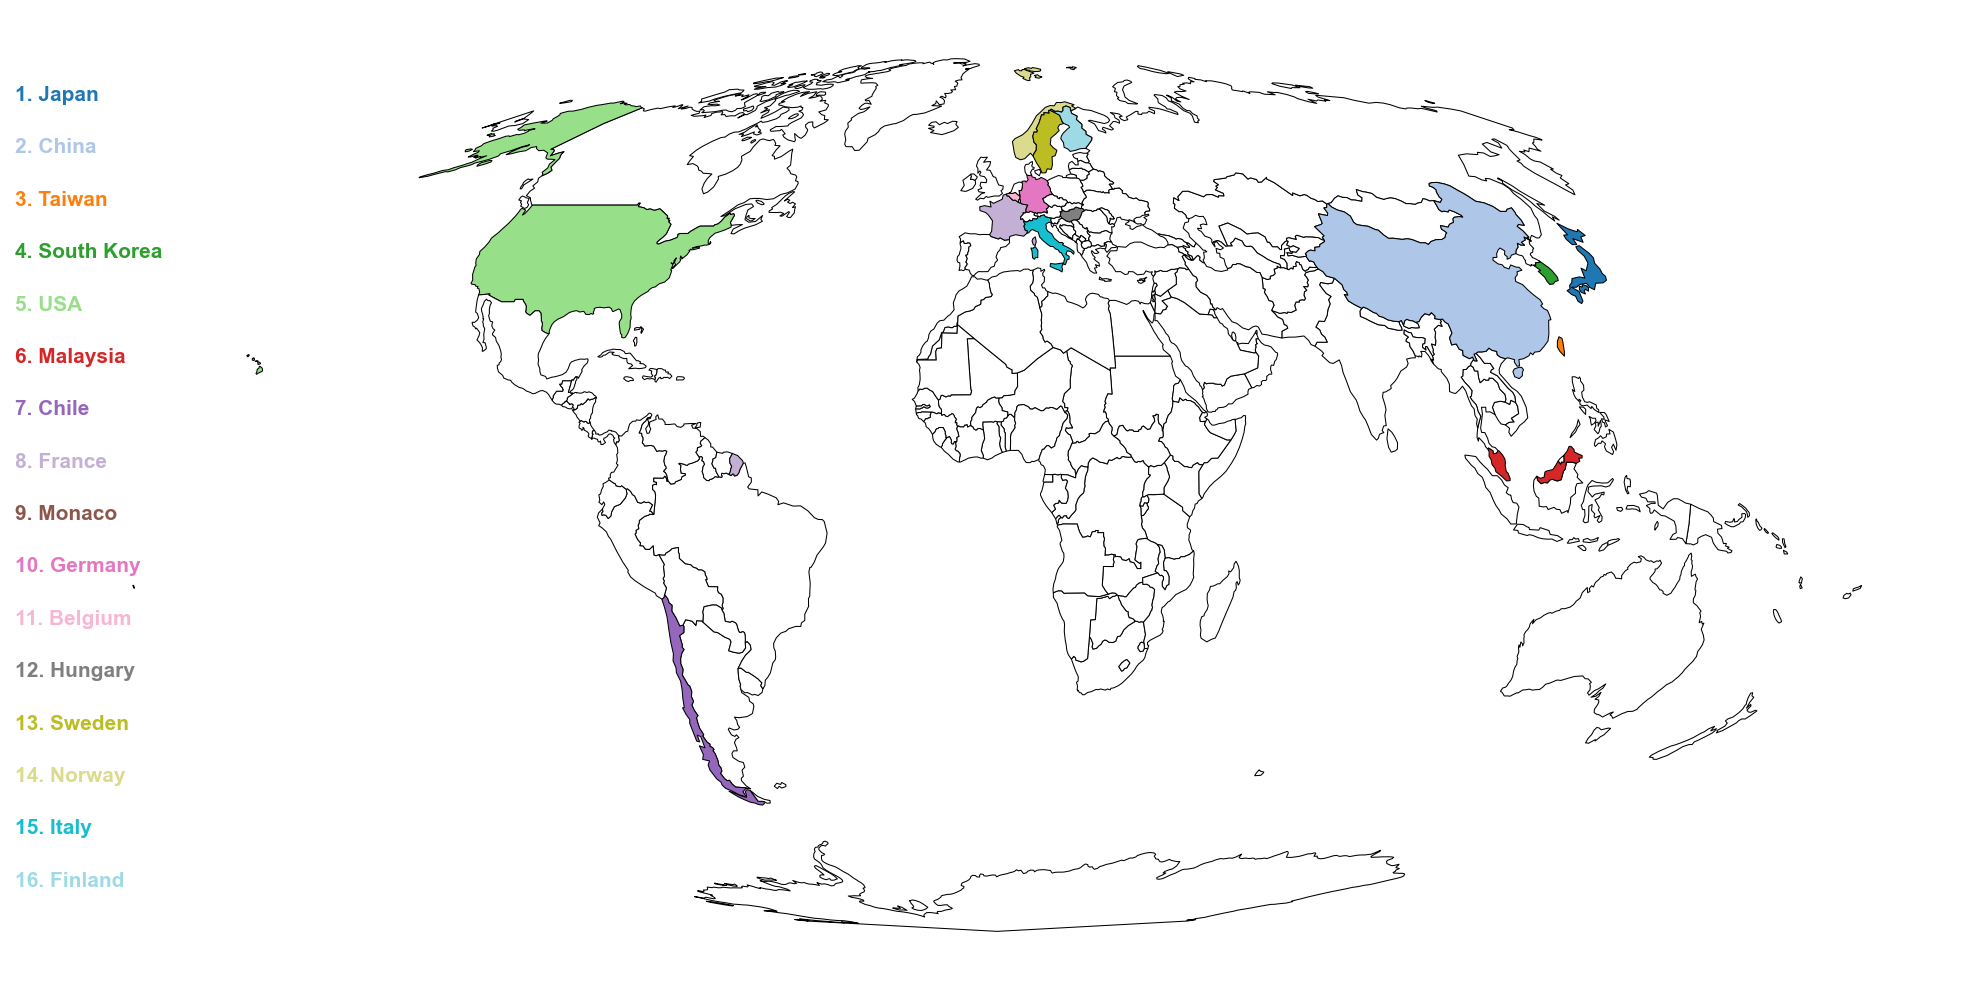

In [12]:
# Load borders
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Extract only "country"
def extract_country(s):
    return s.split("(")[0].strip()

visited_raw = [extract_country(x) for x in countries_visited]
visited_unique_raw = list(dict.fromkeys(visited_raw))

# Convert to official names
visited_countries = [name_map.get(c, c) for c in visited_unique_raw]

cmap = cm.get_cmap("tab20", len(visited_countries))
color_dict = {country: cmap(i) for i, country in enumerate(visited_countries)}

# Add facecolor 
world["facecolor"] = world["NAME"].apply(lambda x: color_dict.get(x, "white"))

# The developper prefers Mollweide
world = world.to_crs("ESRI:54009")

# Figure / Axes
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Plot map
world.plot(
    ax=ax,
    facecolor=world["facecolor"],
    edgecolor="black",
    linewidth=0.5
)

# Show country names on the left side
n = len(visited_countries)
y_start, y_end = 8e6, -8e6
y_positions = np.linspace(y_start, y_end, n)

x_text = -2e7
for idx, (y_pos, country) in enumerate(zip(y_positions, visited_countries)):
    # Use original names
    original_name = [k for k, v in name_map.items() if v == country]
    display_name = original_name[0] if original_name else country
    text = f"{idx+1}. {display_name}"
    ax.text(
        x_text, y_pos,
        text,
        fontsize=10,
        color=color_dict[country],
        weight="bold",
        ha="left",
        va="center"
    )

ax.axis("off")
plt.tight_layout()
plt.savefig(out)
